In [1]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [2]:
raw_dir = '../../data/downloaded_raw'
out_dir = '../../data/processed_dat'

sorted(os.listdir(raw_dir))

['.ipynb_checkpoints',
 '2000census-Table 9 Resident Households by Household Structure and Household Size.xlsx',
 '2000census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv',
 '2010census-Table 9 Resident Households by Household Structure and Household Size.xlsx',
 '2010census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv',
 'M830202 - Divorce Rates, Annual.csv',
 'M830202 - Divorce Rates, Annual_cleaned.csv',
 'README.md',
 'agegroup_grooms_brides.csv',
 'agegroup_grooms_brides.ods',
 'death_rate_agespecific.csv',
 'death_rate_agespecific_cleaned.csv',
 'demographic_ethnicity.csv',
 'input_birth_fertility_rates_sin_1961-2018.csv',
 'input_birth_fertility_rates_sin_1961-2018_cleaned.csv',
 'input_birth_number_by_age_1980-2018.csv',
 'input_birth_number_by_order_sin_1967-2018.csv',
 'input_lifetable_sin_2003-2017.csv',
 'input_marriage_rates_sin_1980-2017.csv',
 'input_marriage_rates_sin_1980-2017_cleaned.csv',
 'inp

In [3]:
df0 = pd.read_csv(os.path.join(raw_dir, 'demographic_ethnicity.csv'))
df0 = df0[df0['Ethnicity']=='All']
df0 = df0[df0['Gender']=='Both']
df0

,Ethnicity,Gender,Variables,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,All,Both,0 - 4 Years,224049,235519,245751,248771,247022,248089,245148,...,197788,194432,188249,186673,183295,181369,183575,187160,187653,185528
1,All,Both,5 - 9 Years,205628,205807,204724,210359,223824,230583,242270,...,221435,215675,208119,206324,205704,205790,204452,201509,200575,199066
2,All,Both,10 - 14 Years,198476,201155,202170,206698,207032,209583,209322,...,248628,244302,240536,233320,226244,220796,214388,207495,206253,206530
3,All,Both,15 - 19 Years,223305,218157,213331,204085,200002,199898,202379,...,262775,263750,260738,258861,255066,247337,242902,239771,232973,226520
4,All,Both,20 - 24 Years,238987,234658,234805,237867,239253,237425,231764,...,241753,247190,255069,264506,266889,263918,264127,260854,259072,255516
5,All,Both,25 - 29 Years,290940,289839,286490,281789,273264,267010,263481,...,274308,272639,262606,254582,255615,265659,271030,279988,290198,291631
6,All,Both,30 - 34 Years,298323,304022,306029,307731,309334,308824,309094,...,297240,298687,297555,295396,296870,292287,290619,285544,279340,281397
7,All,Both,35 - 39 Years,255993,269191,281688,291778,300133,307434,313266,...,317311,320024,316161,313970,305503,302029,301067,301998,300956,303720
8,All,Both,40 - 44 Years,206063,224210,231002,240317,250783,260994,273686,...,312983,309441,306614,308823,312581,316023,316755,313445,311484,303640
9,All,Both,45 - 49 Years,128439,129004,147384,166332,183764,208085,225769,...,322497,323459,323991,320925,316336,308533,303413,301183,303457,307838


In [4]:
def interpolation(midyears, popsize):
    x_news = []
    y_news = []
    for i in range(18):
        tempx = []
        tempy = []
        if i-1>=0:
            tempx.append(midyears[i-1])
            tempy.append(popsize[i-1])
        tempx.append(midyears[i])
        tempy.append(popsize[i])
        if i+1<=17:
            tempx.append(midyears[i+1])
            tempy.append(popsize[i+1])
        else:
            tempx.append(101)
            tempy.append(0)
            
        z = np.polyfit(tempx, tempy, 1)
        f = np.poly1d(z)
        if i<17:
            x_new = [ float(x) for x in list(range(int(midyears[i]-2), int(midyears[i]+3))) ]
        else:
            x_new = [ float(x) for x in list(range(int(midyears[i]-2), int(midyears[i]+14))) ]
        y_new = f(x_new)
        x_news.extend(x_new)
        y_news.extend(y_new)
    miny = abs(min(y_news))
    y_news = [ y+miny for y in y_news ]
    return x_news, y_news

#def check

In [5]:
midyears = [ i*5.+2. for i in range(18) ]
midyears_ex = [ i*5.+2. for i in range(-1,21) ]

popsize =  [ y/5. for y in df0['2000'].tolist()]
x_news, y_news = interpolation(midyears, popsize)

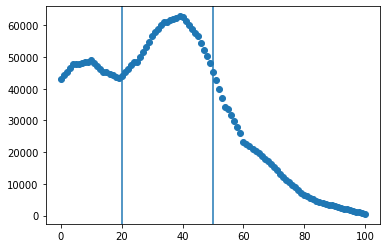

In [6]:
fig, ax = plt.subplots()
ax.scatter(x_news, y_news)
ax.axvline(x=20)
ax.axvline(x=50)


In [7]:
cn = sum([ int(y) for x,y in zip(x_news, y_news) if x<=20 ])
an = sum([ int(y) for x,y in zip(x_news, y_news) if 20<x<=50 ])
rn = sum([ int(y) for x,y in zip(x_news, y_news) if 50<x ])
age_count = (cn, an, rn)
age_count

(968300, 1657292, 678228)

# use the above number as constrain of number of people in each age group

In [8]:
df0_2000 = pd.read_csv(os.path.join(raw_dir, '2000census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv'))
df0_2000 = df0_2000.replace('-', 0)
numcol = ['Total', '1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']
target_col = ['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']
df0_2000 = df0_2000.astype({col: 'float' for col in numcol})
df0_2000#[numcol[0]].dtypes
df0_2000.dtypes

Family Structure        object
Household Structure     object
Total                  float64
1 Person               float64
2 Persons              float64
3 Persons              float64
4 Persons              float64
5 Persons              float64
6 Persons              float64
7 Persons              float64
8 Or More Persons      float64
dtype: object

In [9]:
total = float(df0_2000['Total'][0])

df1_2000 = df0_2000.copy()
for i in df0_2000.index:
    row = df0_2000.loc[i]
    for col in numcol:
        val = row[col]
        #if col=='Total': print(i, val/total)
        df1_2000.at[i, col] = float(val)/total
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.082384,0.171827,0.191376,0.255090,0.178908,0.078162,0.027390,0.014863
1,No Family Nucleus,Subtotal,0.124393,0.082384,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,No Family Nucleus,One Person,0.082384,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.042009,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
4,One Family Nucleus,Subtotal,0.819722,0.000000,0.141806,0.183641,0.244928,0.165232,0.063057,0.015804,0.005254
5,One Family Nucleus,One Generation,0.106228,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
8,Two Family Nuclei,Subtotal,0.053791,0.000000,0.000000,0.000000,0.007495,0.012712,0.014560,0.011096,0.007927
9,Two Family Nuclei,One Or Two Generations,0.015089,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653


In [10]:
df1_2000.columns

Index(['Family Structure', 'Household Structure', 'Total', '1 Person',
       '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons',
       '7 Persons', '8 Or More Persons'],
      dtype='object')

In [11]:
temp = df1_2000[['Household Structure', '1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']]
temp.iat[-1,0] = 'Three Or More Family Nuclei'
temp = temp[temp['Household Structure']!='Subtotal']
temp = temp[temp['Household Structure']!='Total']
temp = temp.reset_index(drop=True)
print(temp['Household Structure'])
temp = temp[['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']]
temp

0                     One Person
1            Two Or More Persons
2                 One Generation
3                Two Generations
4      Three Or More Generations
5         One Or Two Generations
6      Three Or More Generations
7    Three Or More Family Nuclei
Name: Household Structure, dtype: object


,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
3,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
4,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
5,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653
6,0.000000,0.000000,0.000000,0.001523,0.007959,0.011935,0.010010,0.007274
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000182,0.000367,0.001545


In [12]:
nuclei = ['No Family Nucleus', 'No Family Nucleus', 'One Family Nucleus', 'One Family Nucleus', 'One Family Nucleus', 'Two Family Nuclei', 'Two Family Nuclei', 'Two Family Nuclei']
temphs = df1_2000['Household Structure'].tolist()
temphs = [ h for h in temphs if h!='Total' ]
temphs = [ h for h in temphs if h!='Subtotal' ]
#temphs = [ '{} - {}'.format(a,b) for a,b in zip(nuclei, temphs) ]
temphs

['One Person',
 'Two Or More Persons',
 'One Generation',
 'Two Generations',
 'Three Or More Generations',
 'One Or Two Generations',
 'Three Or More Generations']

In [13]:
temphs = ['$1P$',
 '$\geq 2P$',
 '$1G$',
 '$2G$',
 '$\geq 3G$',
 '$\leq 2G$',
 '$\geq 3G$', 
 '$\geq 3FN$']
len(temphs)

8

In [14]:
xs = temp.index.tolist()
ys = list(range(1,9))
xs, ys

([0, 1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
xxs = []
yys = []
zzs = []
#zero_xxs = []
#zero_yys = []
for x in xs:
    for y in ys:
        xxs.append(x)
        yys.append(y)
        zzs.append(temp.iat[x,y-1]*1000)


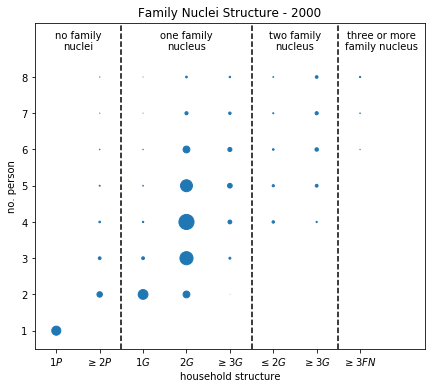

In [16]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(xxs, yys, s=zzs)
ax.set_xlim([-0.5,8.5])
ax.set_xticks(list(range(0,8)))
ax.set_xticklabels(temphs)
ax.axvline(x=1.5, ls='--', c='k')
ax.axvline(x=4.5, ls='--', c='k')
ax.axvline(x=6.5, ls='--', c='k')
ax.set_ylim([0.5,9.5])
ax.set_yticks(list(range(1,9)))
ax.annotate('no family\nnuclei', xy=(0.5, 9), xycoords='data', ha='center', va='center')
ax.annotate('one family\nnucleus', xy=(3, 9), xycoords='data', ha='center', va='center')
ax.annotate('two family\nnucleus', xy=(5.5, 9), xycoords='data', ha='center', va='center')
ax.annotate('three or more\nfamily nucleus', xy=(7.5, 9), xycoords='data', ha='center', va='center')
ax.set_ylabel('no. person')
ax.set_xlabel('household structure')
ax.set_title('Family Nuclei Structure - 2000')
plt.savefig('family_nuclei_2000.png', dpi=92, bbox_inches='tight')

In [17]:
temphs

['$1P$',
 '$\\geq 2P$',
 '$1G$',
 '$2G$',
 '$\\geq 3G$',
 '$\\leq 2G$',
 '$\\geq 3G$',
 '$\\geq 3FN$']

In [18]:
xlabs = ['0FN-1P', '0FN-2P', '1FN-1G', '1FN-2G', '1FN-3G', '2FN-2G', '2FN-3G', '3FN']
xxs2 = [ xlabs[i] for i in xxs ]
#xxs2

In [19]:
print(sum(zzs)/1000.)
prob_dist = {}
for x,y,z in zip(xxs2, yys, zzs):
    if z>0:
        #print(x,y,z/1000.)
        prob_dist[(x,y)] = z/1000.
for k,v in prob_dist.items():
    print(k,v)

0.9999999999999999
('0FN-1P', 1) 0.0823842463582817
('0FN-2P', 2) 0.030021090821667814
('0FN-2P', 3) 0.00773475832978177
('0FN-2P', 4) 0.002666404397381678
('0FN-2P', 5) 0.0009638396223322297
('0FN-2P', 6) 0.0003628058442339005
('0FN-2P', 7) 0.00012348512168202034
('0FN-2P', 8) 0.00013769137461888995
('1FN-1G', 2) 0.095684577473254
('1FN-1G', 3) 0.007846222775901824
('1FN-1G', 4) 0.001850091247855402
('1FN-1G', 5) 0.0005070539509774995
('1FN-1G', 6) 0.0002338567791146226
('1FN-1G', 7) 5.4639434372575374e-05
('1FN-1G', 8) 5.1361068310220854e-05
('1FN-2G', 2) 0.04611021866701636
('1FN-2G', 3) 0.17187489755106056
('1FN-2G', 4) 0.22867914631347735
('1FN-2G', 5) 0.14277284201553944
('1FN-2G', 6) 0.046179064354325804
('1FN-2G', 7) 0.009644952955447005
('1FN-2G', 8) 0.0030117256226163546
('1FN-3G', 2) 9.835098187063567e-06
('1FN-3G', 3) 0.003919833021888557
('1FN-3G', 4) 0.014399676534548515
('1FN-3G', 5) 0.021953031942213333
('1FN-3G', 6) 0.01664317170988646
('1FN-3G', 7) 0.00610431760810412

# Family Structure

In [20]:
def make_dic(com):
    com2 = {}
    for gen, v in com.items():
        for cou, cs in v.items():
            com2[(gen, cou)] = {}
            for st in cs:
                com2[(gen, cou)][st] = 0.0
            if len(com2[(gen, cou)])==0:
                del com2[(gen, cou)]
    return com2

# Family Structure

## No Family Nucleus
def com_zero():
    comp = {'1G':{c:[] for c in range(1,9)}, '2G':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            k = 0 # k must be zero because young people must be dependent and attach to one (or two) parent(s)
            if (i+j+k<9) and (i+j+k>0):
                alist = [i,j,k]
                atuple = (i,j,k)
                c = sum(alist)
                if alist.count(0)==2:
                    comp['1G'][c].append(atuple)
                elif alist.count(0)==1:
                    comp['2G'][c].append(atuple)
    return make_dic(comp)

## One Family Nucleus
def com_one():
    comp = {'1G':{c:[] for c in range(1,9)}, '2G':{c:[] for c in range(1,9)}, '3G':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['1G'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['2G'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['3G'][c].append(atuple)
    return make_dic(comp)

## Two Family Nuclei
def com_two():
    comp = {'1G':{c:[] for c in range(1,9)}, '2G':{c:[] for c in range(1,9)}, '3G':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if c<=1: continue
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['1G'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['2G'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['3G'][c].append(atuple)
    return make_dic(comp)


## Three Or More Family Nuclei
def com_more():
    comp = {'1G':{c:[] for c in range(1,9)}, '2G':{c:[] for c in range(1,9)}, '3G':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if c<=2: continue
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['1G'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['2G'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['3G'][c].append(atuple)
    return make_dic(comp)

In [21]:
xlabs

['0FN-1P', '0FN-2P', '1FN-1G', '1FN-2G', '1FN-3G', '2FN-2G', '2FN-3G', '3FN']

In [22]:
c0 = com_zero()
c0b = {}
for k,v in c0.items():
    #print(k)
    g, p = k
    if p<=1:
        p2 = '1P'
    else:
        p2 = '2P'
    k2 = '0FN-'+p2
    #print(k2)
    k3 = (k2, p)
    if not(k2 in c0b):
        c0b[k3] = []
    #print(v)
    for cp, v2 in v.items():
        c0b[k3].append(cp)
#print(c0b)

In [23]:
c1 = com_one()
c1b = {}
for k,v in c1.items():
    #print(k)
    g,p = k
    k2 = '1FN-'+g
    k3 = (k2, p)
    #print(k3)
    c1b[k3] = list(v.keys())
#c1b

In [24]:
c2 = com_two()
c2b = {}
for k,v in c2.items():
    #print(k)
    g,p = k
    if g=='1G':
        g = '2G'
    k2 = '2FN-'+g
    k3 = (k2, p)
    if not(k3 in c2b):
        c2b[k3] = []
    c2b[k3].extend(list(v.keys()))
#c2b

In [25]:
c3 = com_more()
c3b = {}
for k,v in c3.items():
    #print(k)
    g,p = k
    k2 = '3FN'
    k3 = (k2, p)
    c3b[k3] = list(v.keys())
#c3b

In [26]:
hs_choices = {}
hs_choices.update(c0b)
hs_choices.update(c1b)
hs_choices.update(c2b)
hs_choices.update(c3b)
hs_choices

{('0FN-1P', 1): [(0, 1, 0), (1, 0, 0)],
 ('0FN-2P', 2): [(1, 1, 0)],
 ('0FN-2P', 3): [(1, 2, 0), (2, 1, 0)],
 ('0FN-2P', 4): [(1, 3, 0), (2, 2, 0), (3, 1, 0)],
 ('0FN-2P', 5): [(1, 4, 0), (2, 3, 0), (3, 2, 0), (4, 1, 0)],
 ('0FN-2P', 6): [(1, 5, 0), (2, 4, 0), (3, 3, 0), (4, 2, 0), (5, 1, 0)],
 ('0FN-2P', 7): [(1, 6, 0),
  (2, 5, 0),
  (3, 4, 0),
  (4, 3, 0),
  (5, 2, 0),
  (6, 1, 0)],
 ('0FN-2P', 8): [(1, 7, 0),
  (2, 6, 0),
  (3, 5, 0),
  (4, 4, 0),
  (5, 3, 0),
  (6, 2, 0),
  (7, 1, 0)],
 ('1FN-1G', 1): [(0, 1, 0), (1, 0, 0)],
 ('1FN-1G', 2): [(0, 2, 0), (2, 0, 0)],
 ('1FN-1G', 3): [(0, 3, 0), (3, 0, 0)],
 ('1FN-1G', 4): [(0, 4, 0), (4, 0, 0)],
 ('1FN-1G', 5): [(0, 5, 0), (5, 0, 0)],
 ('1FN-1G', 6): [(0, 6, 0), (6, 0, 0)],
 ('1FN-1G', 7): [(0, 7, 0), (7, 0, 0)],
 ('1FN-1G', 8): [(0, 8, 0), (8, 0, 0)],
 ('1FN-2G', 2): [(0, 1, 1), (1, 0, 1), (1, 1, 0)],
 ('1FN-2G', 3): [(0, 1, 2),
  (0, 2, 1),
  (1, 0, 2),
  (1, 2, 0),
  (2, 0, 1),
  (2, 1, 0)],
 ('1FN-2G', 4): [(0, 1, 3),
  (0, 2, 2)

In [27]:
#prob_dist

In [28]:
age_count # cn, an, rn

(968300, 1657292, 678228)

In [29]:
hs_s = list(prob_dist.keys())
hs_sp = list(prob_dist.values())
random.choices(hs_s, weights=hs_sp)

[('1FN-2G', 4)]

In [30]:
def get_one_hh(target_numbers, try_num=50):
    hs = random.choices(hs_s, weights=hs_sp, k=1)[0]
    while not(hs in hs_choices):
        hs = random.choices(hs_s, weights=hs_sp, k=1)[0]
    hs_opt = hs_choices[hs]
    #this_hs = random.choices(hs_opt, k=1)[0] # retired, adult, child
    #print(this_hs)
    done = False
    success = False
    cur_rn, cur_an, cur_cn = target_numbers
    trial = 0
    while not(done):
        this_hs = random.choices(hs_opt, k=1)[0]
        r,a,c = this_hs
        if cur_rn>r and cur_an>a and cur_cn>c:
            cur_rn = cur_rn - r
            cur_an = cur_an - a
            cur_cn = cur_cn - c
            target_numbers = (cur_rn, cur_an, cur_cn)
            #print(this_hs)
            done = True
            success = True
        else:
            trial+=1
            if trial>try_num:
                done = True
                success = False
    if success:
        return hs, this_hs, target_numbers
    else:
        return hs, None, target_numbers

In [31]:
cn, an, rn = age_count

scale_down = 1.#0.1
cn = int(cn * scale_down)
an = int(an * scale_down)
rn = int(rn * scale_down)

all_pops = sum([cn, an, rn])
cur_pops = 0

hs_comps = {}
ii = 0
target_numbers = (rn, an, cn) # note the reversed sequence

max_trial = 1000
trial = 0
while cur_pops<all_pops:
    hs, this_hs, target_numbers = get_one_hh(target_numbers)
    if this_hs is None: 
        #print(ii, cur_pops, all_pops, trial)
        trial+=1
        if trial<=max_trial:
            continue
        else:
            break
    if not(this_hs in hs_comps): 
        hs_comps[this_hs] = 0
    hs_comps[this_hs]+=1
    cur_pops+=sum(this_hs)
    trial = 0
    ii+=1
    if ii%100000==0:
        print(ii, cur_pops, all_pops)
print('done', cur_pops, all_pops)

100000 368873 3303820
200000 738797 3303820
300000 1108988 3303820
400000 1478902 3303820
500000 1848695 3303820
600000 2203199 3303820
700000 2554134 3303820
800000 2868012 3303820
900000 3056303 3303820
1000000 3244594 3303820
done 3303817 3303820


NameError: name 'cur_rn' is not defined

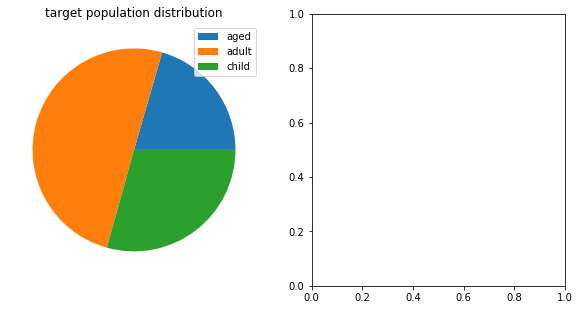

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
labels = ['aged', 'adult', 'child']

patches, texts = axs[0].pie([rn, an, cn]) ## target population distribution of the three ages groups
axs[0].legend(patches, labels, loc="best")
axs[0].set_title('target population distribution')

patches, texts = axs[1].pie([cur_rn, cur_an, cur_cn])  ## generated HH population distribution of the three ages groups
axs[1].legend(patches, labels, loc="best")
axs[1].set_title('generated household structure \n population distribution')

plt.tight_layout()
plt.savefig('generated_hh_agegroup_dist.png', bbox_inches='tight')

In [33]:
tot = float(sum([ v for k,v in hs_comps.items() ]))
hs_comps2 = { k:float(v)/tot for k,v in hs_comps.items() }
#hs_comps2

In [56]:
oy = 2000

headers = ['# household distribution - source unknown\n', 
'# row 0:\n', 
'#   0=dummy probability\n', 
'#   1=first age cut-off\n', 
'#   2=second age cut-off\n', 
'#   3=third age cut-off\n', 
'#   ...\n', 
'# columns:\n', 
'#   0=proportion\n', 
'#   1=number of retired people   (after 3rd cutoff)\n', 
        for ii, ind in self.P.I.items():
            if ind.age<0: print('something wrong')
        print('------------------------pass check------------------------')
'#   2=number of adults           (between 2nd and 3rd cutoff)\n', 
'#   3=number of children         (up-to 1st cutoff)\n',
'0.0 20 50\n']
out_dir = '../../data/processed_dat/data_files'
outpath = os.path.join(out_dir, 'hh_comp_y{}.dat'.format(str(oy)))
with open(outpath, 'w') as fhand:
    for line in headers:
        fhand.write(line)
        
    for k,v in hs_comps2.items():
        a,b,c = k
        """
        if v<0.0001:
            print(v)
            v = 0.05
        else:
            v = round(v, 5)
        """
        #print(str(v))
        #fhand.write('{:1.9f} {} {} {}\n'.format(v, str(c), str(b), str(a)))
        fhand.write('{:1.9f} {} {} {}\n'.format(v, str(a), str(b), str(c)))

In [43]:
0.001376884246698871
0.000000000000000001

1e-18